<a href="https://colab.research.google.com/github/scottcohn97/schmelz_bowles/blob/main/bowles_schmelz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Schmelz + Bowles

In [ ]:
install.packages("tidyverse")
install.packages("latex2exp")

In [ ]:
library(tidyverse)
library(latex2exp)

$$w = \beta_i + \alpha_i \frac{f^\mu}{f^\mu + (1 - f)^\mu},$$

where $i \in \{e, v\}, \; \beta_v > \beta_e, \; \alpha_v > \alpha_e, \; \mu > 1$.

In [ ]:
# w, fraction wishing to be vaccinated at time t+1
w <- function(beta, alpha, f, mu) {
  beta + alpha * ((f^mu) / (f^mu + (1 - f)^mu))
} 

# init df
df <- tibble(
  # fraction vaccinated at time t
  f = seq(0, 1, 0.01)
)

## Panel 1

In [ ]:
# Add columns
df01 <- df %>% 
  # Add vaccine adoption vals
  mutate(w_e = w(beta = 0.1, alpha = 0.8, f = f, mu = 2),
         w_v = w(beta = 0.2, alpha = 0.9, f = f, mu = 2)) %>% 
  # Force frac ceiling
  mutate(w_v = if_else(w_v > 1, 1, w_v)) %>%
  # Reshape for plot
  pivot_longer(!f, names_to = "w", values_to = "w_val")

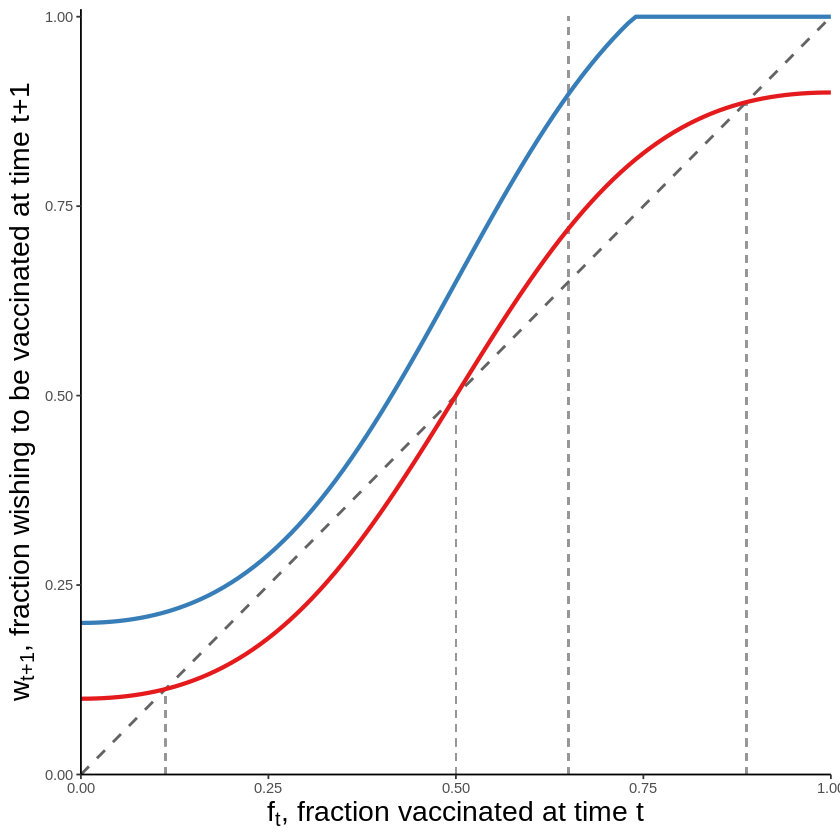

In [42]:
# Base plot
p1 <- df01 %>% ggplot(aes(x = f, y = w_val)) + 
  geom_segment(x = 0.1127, y = 0, xend = 0.1127, yend = 0.1127, color = "#969696", linetype = 2) +
  geom_segment(x = 0.5, y = 0, xend = 0.5, yend = 0.5, color = "#969696", linetype = 2)  +
  geom_segment(x = 0.65, y = 0, xend = 0.65, yend = 1, color = "#969696", linetype = 2)  +
  geom_segment(x = 0.8873, y = 0, xend = 0.8873, yend = 0.8873, color = "#969696", linetype = 2)  +
  geom_line(aes(y = f), linetype = 2, color = "#636363", size = 0.8) + 
  geom_line(aes(color = w), size = 1.2) 
  
# Add labels + Annotations
p2 <- p1 + 
  xlab(latex2exp::TeX("$f_{t}$, fraction vaccinated at time $t$")) +
  ylab(latex2exp::TeX("$w_{t+1}$, fraction wishing to be vaccinated at time $t+1$"))

# Add theme elements
p3 <- p2 + 
  # remove buffer
  scale_x_continuous(limits = c(0,1), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0,1.01), expand = c(0, 0)) +
  # color
  scale_color_brewer(palette = "Set1") + 
  # theme
  theme_classic() + 
  theme(
    panel.grid = element_blank(),
    legend.position = "none",
    axis.title.x = element_text(size = 17),
    axis.title.y = element_text(size = 17),
    )

p3

In [ ]:
# Save plot
ggsave(file = "schmelz_bowles_01.pdf", plot = p3, width = 7, height = 7)

## Panel 2

In [ ]:
# Add columns
df2 <- df %>% 
  # Add vaccine adoption vals
  mutate(w_e = w(beta = 0.05, alpha = 0.8, f = f, mu = 2),
         w_v = w(beta = 0.1, alpha = 0.9, f = f, mu = 2)) %>% 
  # Force frac ceiling
  mutate(w_v = if_else(w_v > 1, 1, w_v)) %>%
  # Reshape for plot
  pivot_longer(!f, names_to = "w", values_to = "w_val")

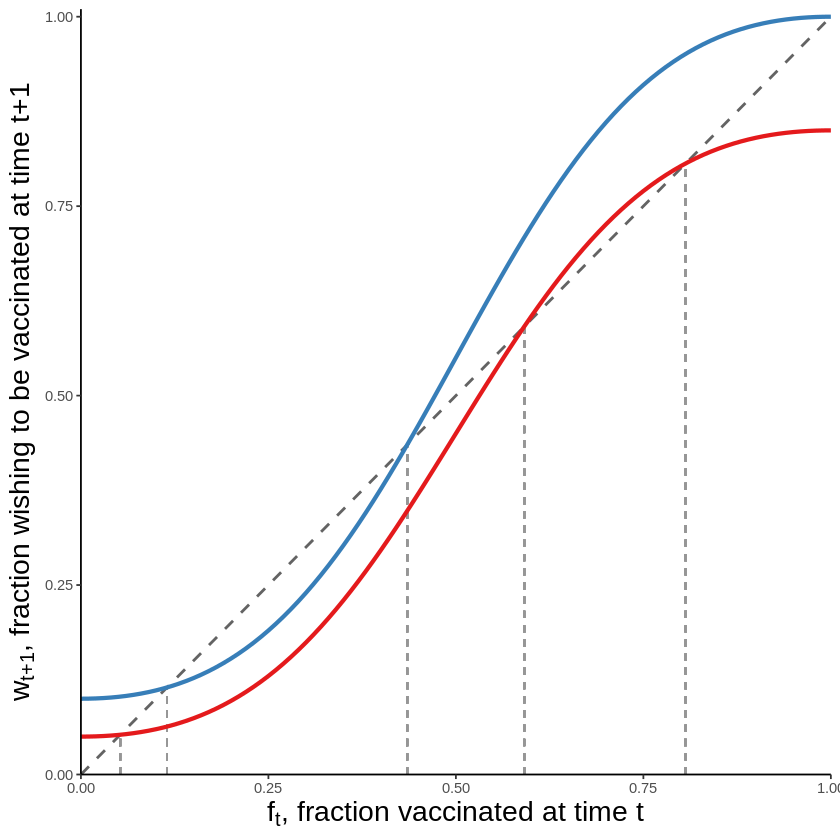

In [ ]:
# Base plot
g1 <- df2 %>% ggplot(aes(x = f, y = w_val)) + 
  geom_segment(x = 0.0524, y = 0, xend = 0.0524, yend = 0.0524, color = "#969696", linetype = 2) +
  geom_segment(x = 0.1149, y = 0, xend = 0.1149, yend = 0.1149, color = "#969696", linetype = 2) +
  geom_segment(x = 0.4351, y = 0, xend = 0.4351, yend = 0.4351, color = "#969696", linetype = 2) +
  geom_segment(x = 0.5912, y = 0, xend = 0.5912, yend = 0.5912, color = "#969696", linetype = 2) +
  geom_segment(x = 0.8064, y = 0, xend = 0.8064, yend = 0.8064, color = "#969696", linetype = 2) +
  geom_line(aes(y = f), linetype = 2, color = "#636363", size = 0.8) + 
  geom_line(aes(color = w), size = 1.2) 

# Add labels and annotation
g2 <- g1 + 
  xlab(latex2exp::TeX("$f_{t}$, fraction vaccinated at time $t$")) +
  ylab(latex2exp::TeX("$w_{t+1}$, fraction wishing to be vaccinated at time $t+1$"))

# Add theme elements
g3 <- g2 + 
  # remove buffer
  scale_x_continuous(limits = c(0,1), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0,1.01), expand = c(0, 0)) +
  # color
  scale_color_brewer(palette = "Set1") + 
  # theme
  theme_classic() + 
  theme(
    panel.grid = element_blank(),
    legend.position = "none",
    axis.title.x = element_text(size = 17),
    axis.title.y = element_text(size = 17),
    )

g3

In [ ]:
# Save plot
ggsave(file = "schmelz_bowles_02.pdf", plot = g3, width = 7, height = 7)

In [ ]:
# Session Info
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] latex2exp_0.4.0 forcats_0.5.0   stringr_1.4.0   dplyr_1.0.3    
 [5] purrr_0.3.4     readr_1.4.0     tidyr_1.1.2     tibble_3.0.5   
 [9] ggplot2_3.3.3   tidyverse_1.3.0

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-4      tidyselect_1.1.0  repr_1.1.0